Epoch 1/100


c:\Users\A.S.T.co\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1220
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1417 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8779 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8581 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7474 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6889 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6980 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5584 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4584 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4039 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3567 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3387 
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3085 
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2363 
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2463 
Ep

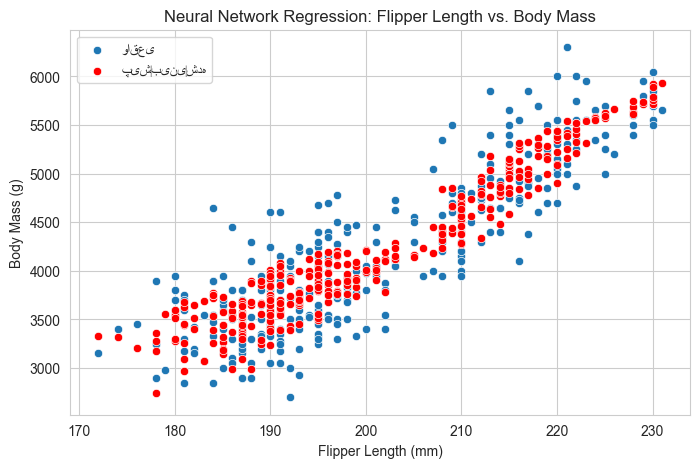

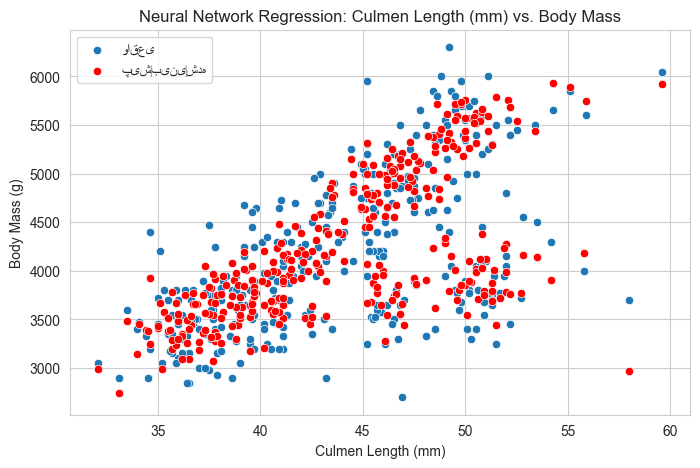

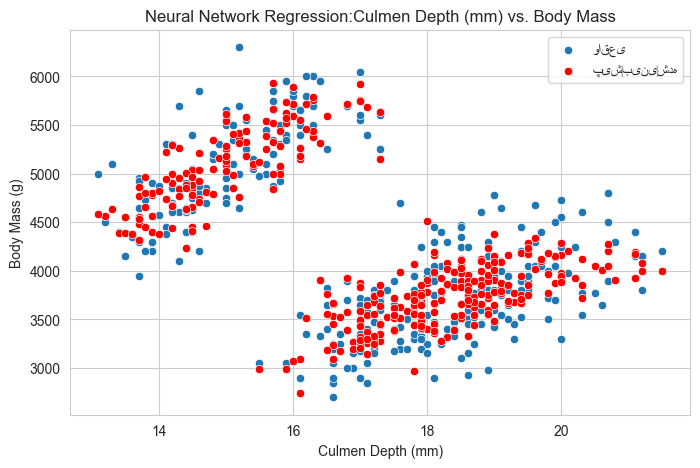

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# تنظیم استایل برای زیبایی نمودار
sns.set_style("whitegrid")

# بارگذاری داده‌ها
penguins = pd.read_csv("C:/Users/A.S.T.co/Downloads/penguins.csv")

# انتخاب ستون‌های مورد نظر و حذف مقادیر گمشده
columns = ["Flipper Length (mm)", "Body Mass (g)", "Species", "Culmen Length (mm)", "Culmen Depth (mm)"]
penguins_non_missing = penguins[columns].dropna()

# تعریف X و y برای مدل
X = penguins_non_missing[["Flipper Length (mm)", "Culmen Length (mm)", "Culmen Depth (mm)"]]
y = penguins_non_missing["Body Mass (g)"]

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# ایجاد مدل شبکه عصبی
model = Sequential([
    Dense(10, activation='relu', input_shape=(X.shape[1],)),
    Dense(10, activation='relu'),
    Dense(1)  # خروجی مدل
])

# کامپایل کردن مدل
model.compile(optimizer='adam', loss='mse')

# آموزش مدل
history = model.fit(X_scaled, y_scaled, epochs=100, verbose=1)

# پیش‌بینی مقادیر و تبدیل به مقیاس اصلی
y_pred_scaled = model.predict(X_scaled)
y_pred = scaler.inverse_transform(y_pred_scaled)

# محاسبه دقت مدل (R²)
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.4f}")

# رسم نمودار مقایسه‌ای
plt.figure(figsize=(8, 5))
sns.scatterplot(x=penguins_non_missing["Flipper Length (mm)"], y=y, label="واقعی")
sns.scatterplot(x=penguins_non_missing["Flipper Length (mm)"], y=y_pred.flatten(), color='red', label="پیش‌بینی‌شده")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Neural Network Regression: Flipper Length vs. Body Mass")
plt.legend()
plt.show()


# رسم نمودار مقایسه‌ای
plt.figure(figsize=(8, 5))
sns.scatterplot(x=penguins_non_missing["Culmen Length (mm)"], y=y, label="واقعی")
sns.scatterplot(x=penguins_non_missing["Culmen Length (mm)"], y=y_pred.flatten(), color='red', label="پیش‌بینی‌شده")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Neural Network Regression: Culmen Length (mm) vs. Body Mass")
plt.legend()
plt.show()

# رسم نمودار مقایسه‌ای
plt.figure(figsize=(8, 5))
sns.scatterplot(x=penguins_non_missing["Culmen Depth (mm)"], y=y, label="واقعی")
sns.scatterplot(x=penguins_non_missing["Culmen Depth (mm)"], y=y_pred.flatten(), color='red', label="پیش‌بینی‌شده")
plt.xlabel("Culmen Depth (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Neural Network Regression:Culmen Depth (mm) vs. Body Mass")
plt.legend()
plt.show()

Epoch 1/100


c:\Users\A.S.T.co\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6561  
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4504
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3272
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3036
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3057
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2313
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2491
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2414
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2161 
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2151
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2236 
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2169
Epoch 13/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2010
Epoch 14/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2304 
Epoch 15/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2022
Epoch 16/10

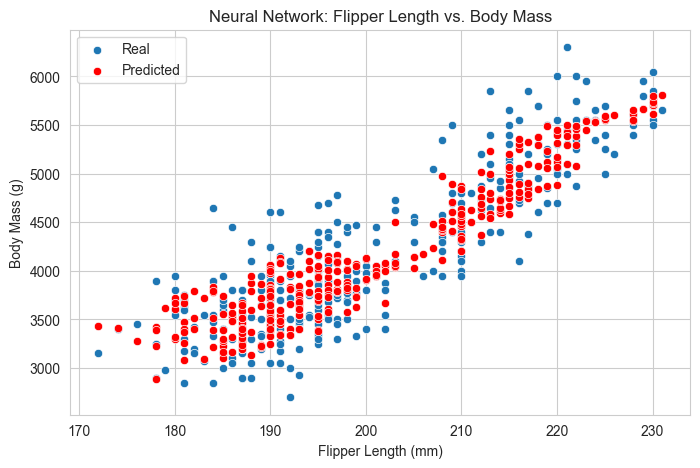

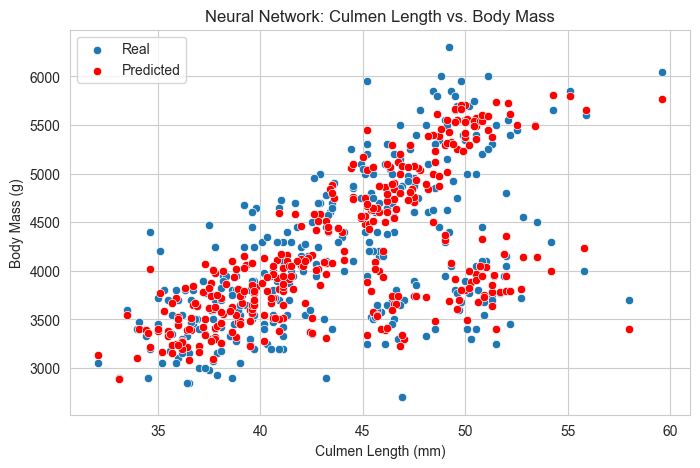

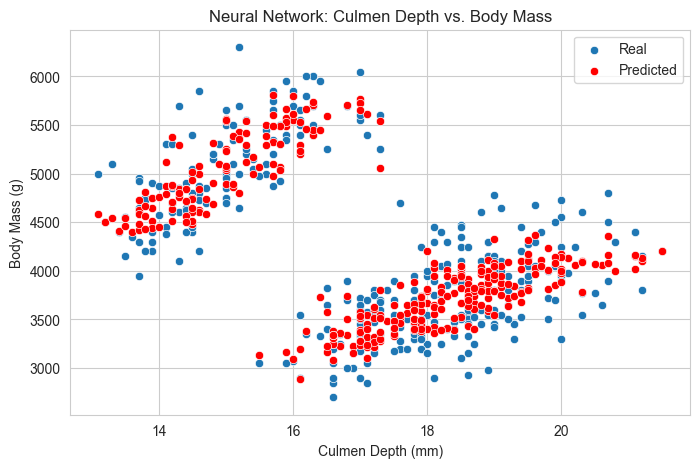

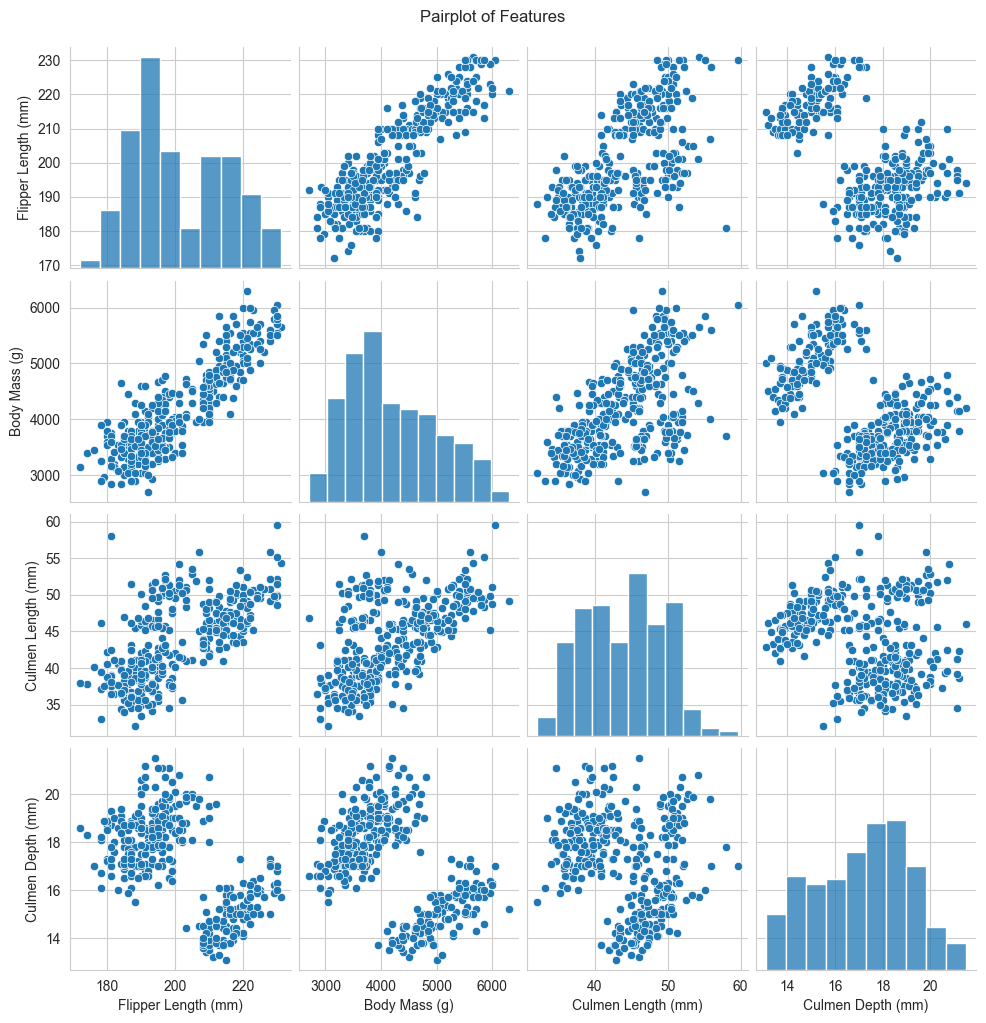

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# تنظیم استایل نمودار
sns.set_style("whitegrid")

# بارگذاری داده‌ها
file_path = "C:/Users/A.S.T.co/Downloads/penguins.csv"
penguins = pd.read_csv(file_path)

# انتخاب ستون‌های مورد نیاز و حذف مقادیر گمشده
columns = ["Flipper Length (mm)", "Body Mass (g)", "Culmen Length (mm)", "Culmen Depth (mm)"]
penguins_non_missing = penguins[columns].dropna()

# تعریف X و y برای مدل
X = penguins_non_missing[["Flipper Length (mm)", "Culmen Length (mm)", "Culmen Depth (mm)"]]
y = penguins_non_missing["Body Mass (g)"]

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y.values.reshape(-1, 1)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

# ایجاد مدل شبکه عصبی
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(10, activation='relu'),
    Dense(1)
])

# کامپایل مدل
model.compile(optimizer='adam', loss='mse')

# آموزش مدل
history = model.fit(X_scaled, y_scaled, epochs=100, verbose=1, batch_size=8)

# پیش‌بینی مقدار y و برگرداندن مقیاس آن
y_pred_scaled = model.predict(X_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# محاسبه R²
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.4f}")

# رسم نمودار پراکندگی و پیش‌بینی مدل
features = ["Flipper Length (mm)", "Culmen Length (mm)", "Culmen Depth (mm)"]
titles = [
    "Neural Network: Flipper Length vs. Body Mass",
    "Neural Network: Culmen Length vs. Body Mass",
    "Neural Network: Culmen Depth vs. Body Mass"
]

for i, feature in enumerate(features):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X[feature], y=y.flatten(), label="Real")
    sns.scatterplot(x=X[feature], y=y_pred.flatten(), color='red', label="Predicted")
    plt.xlabel(feature)
    plt.ylabel("Body Mass (g)")
    plt.title(titles[i])
    plt.legend()
    plt.show()


# رسم Pairplot از ویژگی‌ها
sns.pairplot(penguins_non_missing[columns])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()